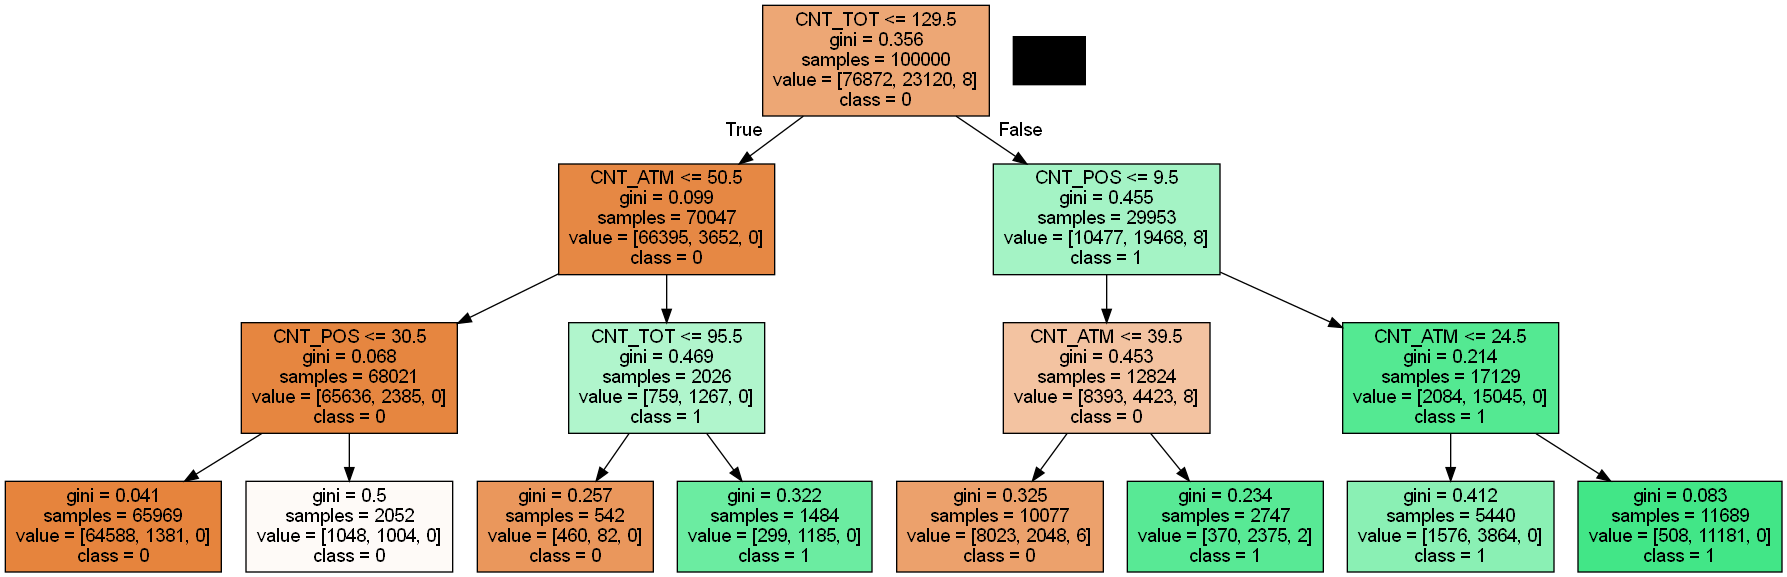

In [14]:
#pydotplus
# pip install pydotplus
#画决策树图。对分类结果进行解读
import pydotplus
from IPython.display import Image
import sklearn.tree as tree
dot_data=tree.export_graphviz(clf,
                              out_file=None,
                              feature_names=df.columns,
                              class_names=["0","1","2"],
                              filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [13]:
#pip install GraphhViz 决策树
#pip install GraphhViz 决策树
from sklearn import tree
#分类树
clf=tree.DecisionTreeClassifier(criterion="gini",
                                max_depth=3,
                                min_samples_split=100,
                                min_samples_leaf=100,
                                random_state=12345)
clf.fit(df,result.labels_)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=100, min_samples_split=100,
                       random_state=12345)

In [12]:
#进行Kmeans聚类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
result = kmeans.fit(score)
result.labels_

array([0, 0, 1, ..., 1, 0, 0])

In [11]:
#Kmeans-异常识别
var = ['TBM','POS','CSC']
#求偏度
skew_var={}
for i in var:
    skew_var[i]=score[i].skew()
skew_var #》右偏； 《0 左偏

{'TBM': 48.628699788842276,
 'POS': 2.0618211843113676,
 'CSC': 6.1686981225261555}

In [10]:
score = pd.DataFrame(score,columns=['TBM','POS','CSC'])
score.head()

,TBM,POS,CSC
0,-0.565251,-0.881401,0.162095
1,-0.311872,-0.324612,0.940980
2,1.040200,0.966987,2.393213
3,-0.484598,-0.780736,-0.504400
4,-0.748515,-0.517109,-0.379227


In [9]:
#输出 因子得分
score = fa.get_component_scores(std_data)
score
#等同方法,矩阵的点乘
np.dot(std_data,fa.comps['rot'])

array([[-0.56525064, -0.88140141,  0.16209457],
       [-0.3118724 , -0.32461235,  0.9409801 ],
       [ 1.04020038,  0.96698658,  2.39321276],
       ...,
       [ 0.36557169,  4.70633691,  0.34707213],
       [-0.92694948, -0.86005301, -0.49135625],
       [ 0.80831631,  0.24072749, -0.48821511]])

array([[-0.56525064, -0.88140141,  0.16209457],
       [-0.3118724 , -0.32461235,  0.9409801 ],
       [ 1.04020038,  0.96698658,  2.39321276],
       ...,
       [ 0.36557169,  4.70633691,  0.34707213],
       [-0.92694948, -0.86005301, -0.49135625],
       [ 0.80831631,  0.24072749, -0.48821511]])

In [8]:
#最大方差拉升旋转,看数据 的变异方向
fa.rotate_components(method='varimax')
#因子的载荷矩阵（权重距阵）
data.columns
fa.comps['rot']  #表示三个主要因子的权重系数

Index(['CNT_TBM', 'CNT_ATM', 'CNT_POS', 'CNT_CSC', 'CNT_TOT'], dtype='object')

array([[ 0.74745163, -0.11597583, -0.04785681],
       [-0.03773191,  0.68195098,  0.04902242],
       [ 0.0178318 ,  0.70625604, -0.06050365],
       [-0.00214346, -0.00555497,  0.99390812],
       [ 0.6630006 ,  0.15054573,  0.06158313]])

In [7]:
#因子分析
from fa_kit import FactorAnalysis
from fa_kit import plotting as fa_plotting
#实例化
fa=FactorAnalysis.load_data_samples(
    std_data,
    preproc_demean=True,
    preproc_scale=True
)
fa.extract_components()
#设定提取主成分的方法
fa.find_comps_to_retain(method='top_n',num_keep=3)

array([0, 1, 2], dtype=int64)

In [6]:
#主成分分析 PCA 确定需要几个主成分
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(std_data)
#查看方差特征
pca.explained_variance_
#查看方差比率
pca.explained_variance_ratio_
sum(pca.explained_variance_ratio_)

PCA(n_components=3)

array([2.35145149, 1.22005478, 0.77115778])

array([0.47028559, 0.24400851, 0.15423001])

0.8685241224677528

In [5]:
#数据标准化
from sklearn import preprocessing
std_data= preprocessing.scale(data)
std_data

array([[-0.3374763 , -0.79112548, -0.43037594,  0.19094614, -0.50493234],
       [-0.23861679, -0.1198557 , -0.33391478,  0.93300005, -0.19620815],
       [ 0.53248735,  0.31167487,  0.9683109 ,  2.41710788,  0.96812305],
       ...,
       [-0.23861679,  4.38724139,  2.17407542,  0.19094614,  1.0122265 ],
       [-0.57473911, -0.69522979, -0.47860652, -0.46865734, -0.77837376],
       [ 0.59180305, -0.07190786,  0.38954393, -0.46865734,  0.53590919]])

In [15]:
data.corr()

,CNT_TBM,CNT_ATM,CNT_POS,CNT_CSC,CNT_TOT
CNT_TBM,1.000000,0.055648,0.083624,0.198835,0.939048
CNT_ATM,0.055648,1.000000,0.341161,0.242106,0.321910
CNT_POS,0.083624,0.341161,1.000000,0.234055,0.345300
CNT_CSC,0.198835,0.242106,0.234055,1.000000,0.371736
CNT_TOT,0.939048,0.321910,0.345300,0.371736,1.000000


In [4]:
data = df.iloc[:,1:]
data.head()

,CNT_TBM,CNT_ATM,CNT_POS,CNT_CSC,CNT_TOT
0,34,3,3,9,49
1,44,17,5,18,84
2,122,26,32,36,216
3,42,3,6,1,52
4,20,15,2,2,39


In [3]:
df= pd.read_csv('profile_bank.csv')
df.head()

,ID,CNT_TBM,CNT_ATM,CNT_POS,CNT_CSC,CNT_TOT
0,41360,34,3,3,9,49
1,52094,44,17,5,18,84
2,57340,122,26,32,36,216
3,76885,42,3,6,1,52
4,89150,20,15,2,2,39


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir(r'C:\Data\Jupyter_file\机器学习')

In [1]:
#全部行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"